In [1]:
from keras import backend as K
import time
import keras
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import warnings 
warnings.filterwarnings("ignore",category=DeprecationWarning)

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


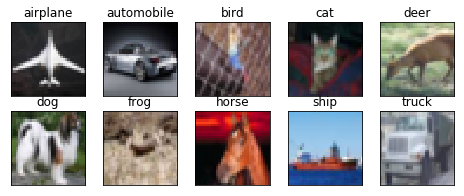

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #32 Receptive Field 3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(Convolution2D(64, 3, 3, border_mode='same')) #32 receptive field 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(MaxPooling2D(pool_size=(2, 2))) #16 receptive field 10

model.add(Convolution2D(10, 1))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(Convolution2D(64, 3, 3, border_mode='same')) #16 receptive field 12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(Convolution2D(128, 3, 3, border_mode='same')) #16 receptive field 14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(MaxPooling2D(pool_size=(2, 2))) #8 receptive field 28 

model.add(Convolution2D(10, 1))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Convolution2D(128, 3, 3, border_mode='same'))# 8 receptive field 30 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(Convolution2D(256, 3, 3, border_mode='same')) # 8 receptive field 32 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(MaxPooling2D(pool_size=(2, 2))) # 4 receptive field 64

model.add(Convolution2D(16, 1))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(Convolution2D(128, 3, 3, border_mode='same')) # 4 receptive field 66 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(Convolution2D(128, 3, 3, border_mode='same')) # 4 receptive field 68 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(Convolution2D(16, 1))#4 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(128, 3, 3, border_mode='same')) # 4 receptive field 70 
model.add(Activation('relu'))
#model.add(BatchNormalization())

model.add(Convolution2D(10, 4, 4))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 64)        256       
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0727 06:55:19.599663 140618465580928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_o

Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 23s 59ms/step - loss: 1.4528 - acc: 0.4702 - val_loss: 1.5966 - val_acc: 0.4949
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 17s 45ms/step - loss: 1.0033 - acc: 0.6431 - val_loss: 0.9297 - val_acc: 0.6732
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 17s 44ms/step - loss: 0.8129 - acc: 0.7149 - val_loss: 0.8466 - val_acc: 0.7148
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 17s 43ms/step - loss: 0.7029 - acc: 0.7543 - val_loss: 0.7370 - val_acc: 0.7391
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 17s 44ms/step - loss: 0.6266 - acc: 0

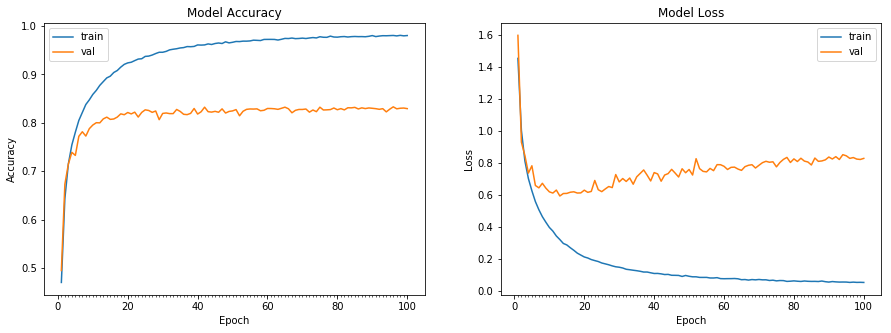

Accuracy on test data is: 82.94


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[LearningRateScheduler(scheduler, verbose=1)],verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.save('cifar10_without_cutout.h5')

In [0]:
from google.colab import files
files.download('cifar10_without_cutout.h5')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
model=keras.models.load_model("drive/My Drive/EVA/cifar10_without_cutout.h5")

W0802 02:08:02.364524 140268927735680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 02:08:02.423879 140268927735680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 02:08:02.474306 140268927735680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 02:08:02.475337 140268927735680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0802 02:08:02.476861 140268927

##grad cam on cifar10 without cutout data augmentation

deer


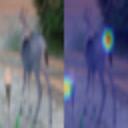

 
dog


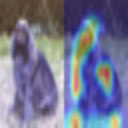

 
automobile


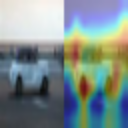

 
dog


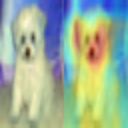

 
ship


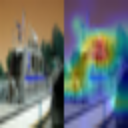

 
dog


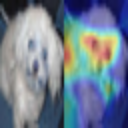

 
ship


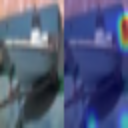

 
truck


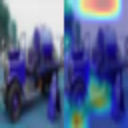

 
dog


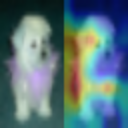

 
ship


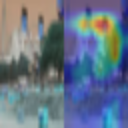

 
ship


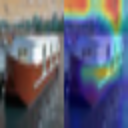

 
bird


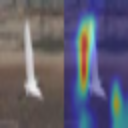

 
frog


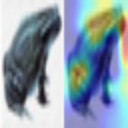

 
truck


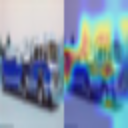

 
ship


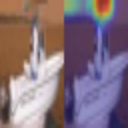

 
horse


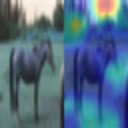

In [38]:
import cv2
from google.colab.patches import cv2_imshow

(trainX, trainy), (test_feat, testy) = cifar10.load_data()
images = [100,101,201,510,600,1000,1600,1601,3000,4000,5500,7000,7500,8000,9000,9999]
for j in images:
  x = test_feat[j]
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x,batch_size=1)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_8")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  img = (test_feat[j])
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  concatimg = cv2.hconcat([img,superimposed_img])
  concatimg = cv2.resize(concatimg,(128,128))
  # Display the concatenated image
  print (class_names[testy[j][0]])
  testy.shape
  cv2_imshow(concatimg)
  cv2.waitKey(0)
  print (" ")
  j = j + 1

##with cutout data augmentation

In [0]:
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #32 Receptive Field 3
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.12))

model1.add(Convolution2D(64, 3, 3, border_mode='same')) #32 receptive field 5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.12))

model1.add(MaxPooling2D(pool_size=(2, 2))) #16 receptive field 10

model1.add(Convolution2D(10, 1))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.12))

model1.add(Convolution2D(64, 3, 3, border_mode='same')) #16 receptive field 12
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.12))

model1.add(Convolution2D(128, 3, 3, border_mode='same')) #16 receptive field 14
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.12))

model1.add(MaxPooling2D(pool_size=(2, 2))) #8 receptive field 28 

model1.add(Convolution2D(10, 1))
model1.add(Activation('relu'))
model1.add(BatchNormalization())


model1.add(Convolution2D(128, 3, 3, border_mode='same'))# 8 receptive field 30 
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.12))

model1.add(Convolution2D(256, 3, 3, border_mode='same')) # 8 receptive field 32 
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.12))

model1.add(MaxPooling2D(pool_size=(2, 2))) # 4 receptive field 64

model1.add(Convolution2D(16, 1))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.12))

model1.add(Convolution2D(128, 3, 3, border_mode='same')) # 4 receptive field 66 
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.12))

model1.add(Convolution2D(128, 3, 3, border_mode='same')) # 4 receptive field 68 
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.12))

model1.add(Convolution2D(16, 1))#4 
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, 3, 3, border_mode='same')) # 4 receptive field 70 
model1.add(Activation('relu'))
#model.add(BatchNormalization())

model1.add(Convolution2D(10, 4, 4))


model1.add(Flatten())
model1.add(Activation('softmax'))


model1.summary()

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 64)        256       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))


Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
  3/390 [..............................] - ETA: 23s - loss: 1.5949 - acc: 0.4193

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`
  # This is added back by InteractiveShellApp.init_path()


390/390 [==============================] - 17s 45ms/step - loss: 1.3983 - acc: 0.4908 - val_loss: 1.2444 - val_acc: 0.5719
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 17s 43ms/step - loss: 1.1189 - acc: 0.5972 - val_loss: 1.1259 - val_acc: 0.6093
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 17s 43ms/step - loss: 0.9512 - acc: 0.6625 - val_loss: 0.8945 - val_acc: 0.6823
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 17s 43ms/step - loss: 0.8450 - acc: 0.6997 - val_loss: 0.7590 - val_acc: 0.7340
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 17s 43ms/step - loss: 0.7689 - acc: 0.7271 - val_loss: 0.8657 - val_acc: 0.7083
Epoch 6/100

Epoch 00006: LearningRat

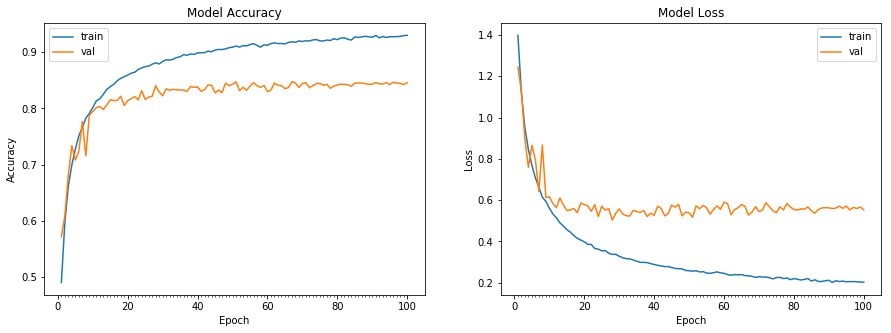

Accuracy on test data is: 84.56


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))
# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[LearningRateScheduler(scheduler, verbose=1)],verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

In [0]:
model1.save('cifar10_with_cutout.h5')

In [0]:
from google.colab import files
files.download('cifar10_with_cutout.h5')

In [0]:
model=keras.models.load_model("drive/My Drive/EVA/cifar10_with_cutout.h5")

deer


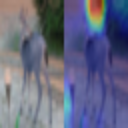

 
dog


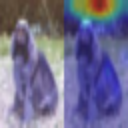

 
automobile


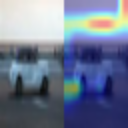

 
dog


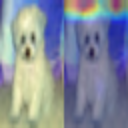

 
ship


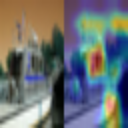

 
dog


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


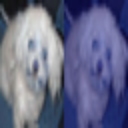

 
ship


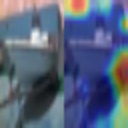

 
truck


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


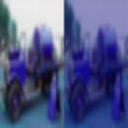

 
dog


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


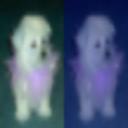

 
ship


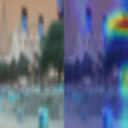

 
ship


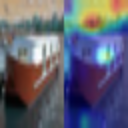

 
bird


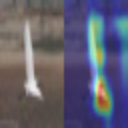

 
frog


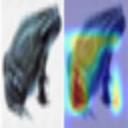

 
truck


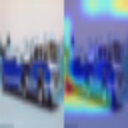

 
ship


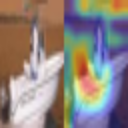

 
horse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


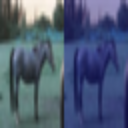

In [40]:
import cv2
from google.colab.patches import cv2_imshow

(trainX, trainy), (test_feat, testy) = cifar10.load_data()
images = [100,101,201,510,600,1000,1600,1601,3000,4000,5500,7000,7500,8000,9000,9999]
for j in images:
  x = test_feat[j]
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x,batch_size=1)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_22")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  img = (test_feat[j])
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  concatimg = cv2.hconcat([img,superimposed_img])
  concatimg = cv2.resize(concatimg,(128,128))
  # Display the concatenated image
  print (class_names[testy[j][0]])
  cv2_imshow(concatimg)
  cv2.waitKey(0)
  print (" ")
  j = j + 1